In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [24]:
data = pd.read_csv(r'dataset.csv')   #importing data
data = pd.DataFrame(data)

In [25]:
#removing empty dataset of 2019-01-27 3:30:02PM to 2019-01-28 9:28:58AM
data1 = data.head(33753)           
data2 = data.tail(22502)
data = pd.DataFrame()
data = pd.concat([data1, data2])

data.reset_index(inplace = True)
del data['index']

data['TimeStamp'] = pd.to_datetime(data['TimeStamp'], dayfirst = True)   #converting timestamp into pandas datetime

In [26]:
data['hour'] = data['TimeStamp'].dt.hour
data['minute'] = data['TimeStamp'].dt.minute
data['day'] = data['TimeStamp'].dt.day

In [27]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56255 entries, 0 to 56254
Data columns (total 8 columns):
TimeStamp    56255 non-null datetime64[ns]
Close        56190 non-null float64
High         56190 non-null float64
Low          56190 non-null float64
Open         56190 non-null float64
hour         56255 non-null int64
minute       56255 non-null int64
day          56255 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 3.4 MB


In [28]:
data.fillna(method='ffill', inplace=True)   #filling the empty values with last traded price

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56255 entries, 0 to 56254
Data columns (total 8 columns):
TimeStamp    56255 non-null datetime64[ns]
Close        56255 non-null float64
High         56255 non-null float64
Low          56255 non-null float64
Open         56255 non-null float64
hour         56255 non-null int64
minute       56255 non-null int64
day          56255 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 3.4 MB


In [30]:
data.head()

,TimeStamp,Close,High,Low,Open,hour,minute,day
0,2019-01-25 09:15:00,2954445.0,2954445.0,2954250.0,2954250.0,9,15,25
1,2019-01-25 09:15:02,2953837.0,2954050.0,2953837.0,2954050.0,9,15,25
2,2019-01-25 09:15:04,2953047.0,2953637.0,2953047.0,2953637.0,9,15,25
3,2019-01-25 09:15:06,2953092.0,2953092.0,2952845.0,2952845.0,9,15,25
4,2019-01-25 09:15:08,2951847.0,2952695.0,2951847.0,2952695.0,9,15,25
5,2019-01-25 09:15:10,2951295.0,2951847.0,2951295.0,2951847.0,9,15,25
6,2019-01-25 09:15:12,2950545.0,2950850.0,2950545.0,2950850.0,9,15,25
7,2019-01-25 09:15:14,2949955.0,2949955.0,2949955.0,2949955.0,9,15,25
8,2019-01-25 09:15:16,2949397.0,2949765.0,2949397.0,2949765.0,9,15,25
9,2019-01-25 09:15:18,2950097.0,2950097.0,2949627.0,2949627.0,9,15,25


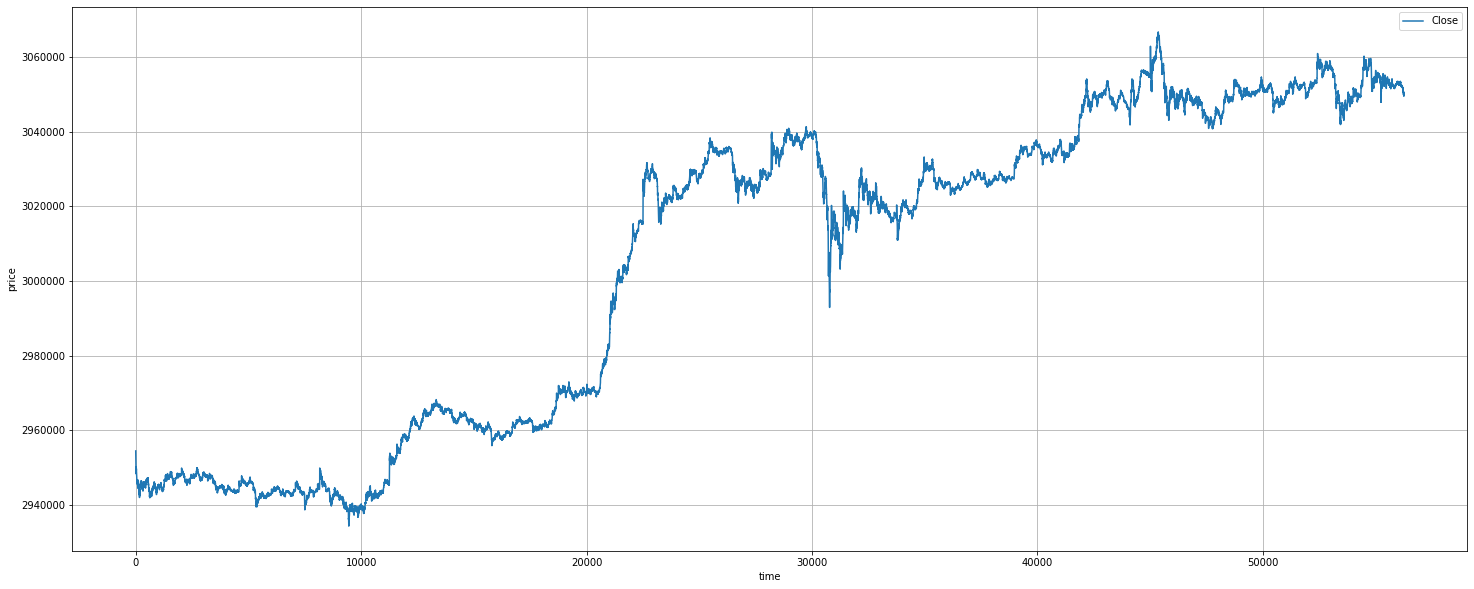

In [31]:
#visualising the closing price of the Data
plt.figure(figsize = (25,10))
plt.plot(data['Close'], label='Close')
plt.xlabel('time')
plt.ylabel('price')
plt.grid()
plt.legend()
plt.show()

In [32]:
#calculating RSI
k=14

ch = 0                #data['Close'][i] - data['Close'][i-1] 
change = [0]          #to store change in price of every 2 seconds
gain = [0]            #to store the change if it is gain
loss = [0]            #to store the change if it is loss
avggain = [0]*k      #to store smooth avg gain of 14 days 
avgloss = [0]*k      #to store smooth avg gain of 14 days
RS = [np.nan]*k               #to store RS values
RSI = [np.nan]*k

for i in range(1, len(data)):
    ch = data['Close'][i] - data['Close'][i-1]
    change.append(ch)
    
    if i==k:
        avggain.append(sum(gain) / k)
        avgloss.append(sum(loss) / k)
        if avgloss==0:
            RS.append(np.nan)
            RSI.append(100)
        else:
            RS.append(avggain[i]/avgloss[i])
            RSI.append( 100 - ( 100/(1+RS[i]) ) )
    
    if ch>0:
        gain.append(ch)
        loss.append(0)
    else:
        gain.append(0)
        loss.append(abs(ch))
    
    if i>k:
        avggain.append( (avggain[i-1]*(k-1) + gain[i])/k )
        avgloss.append( (avgloss[i-1]*(k-1) + loss[i])/k )
        if avgloss==0:
            RS.append(np.nan)
            RSI.append(100)
        else:
            RS.append(avggain[i]/avgloss[i])
            RSI.append( 100 - ( 100/(1+RS[i]) ) )
            
data["Change"] = change
data['Gain'] = gain
data['Loss'] = loss
data['AVG Gain'] = avggain
data['AVG Loss'] = avgloss
data["RS"] = RS
data['RSI'] = RSI

In [33]:
data.head()

,TimeStamp,Close,High,Low,Open,hour,minute,day,Change,Gain,Loss,AVG Gain,AVG Loss,RS,RSI
0,2019-01-25 09:15:00,2954445.0,2954445.0,2954250.0,2954250.0,9,15,25,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN
1,2019-01-25 09:15:02,2953837.0,2954050.0,2953837.0,2954050.0,9,15,25,-608.0,0.0,608.0,0.000000,0.000000,NaN,NaN
2,2019-01-25 09:15:04,2953047.0,2953637.0,2953047.0,2953637.0,9,15,25,-790.0,0.0,790.0,0.000000,0.000000,NaN,NaN
3,2019-01-25 09:15:06,2953092.0,2953092.0,2952845.0,2952845.0,9,15,25,45.0,45.0,0.0,0.000000,0.000000,NaN,NaN
4,2019-01-25 09:15:08,2951847.0,2952695.0,2951847.0,2952695.0,9,15,25,-1245.0,0.0,1245.0,0.000000,0.000000,NaN,NaN
5,2019-01-25 09:15:10,2951295.0,2951847.0,2951295.0,2951847.0,9,15,25,-552.0,0.0,552.0,0.000000,0.000000,NaN,NaN
6,2019-01-25 09:15:12,2950545.0,2950850.0,2950545.0,2950850.0,9,15,25,-750.0,0.0,750.0,0.000000,0.000000,NaN,NaN
7,2019-01-25 09:15:14,2949955.0,2949955.0,2949955.0,2949955.0,9,15,25,-590.0,0.0,590.0,0.000000,0.000000,NaN,NaN
8,2019-01-25 09:15:16,2949397.0,2949765.0,2949397.0,2949765.0,9,15,25,-558.0,0.0,558.0,0.000000,0.000000,NaN,NaN
9,2019-01-25 09:15:18,2950097.0,2950097.0,2949627.0,2949627.0,9,15,25,700.0,700.0,0.0,0.000000,0.000000,NaN,NaN


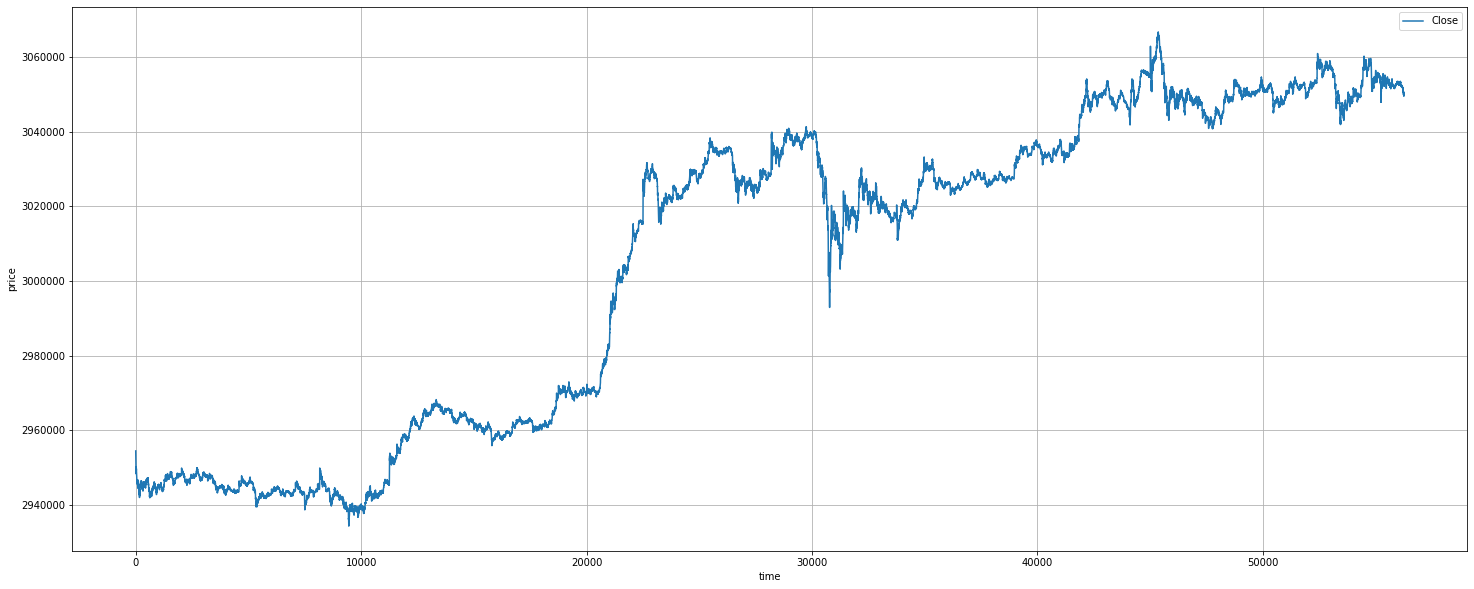

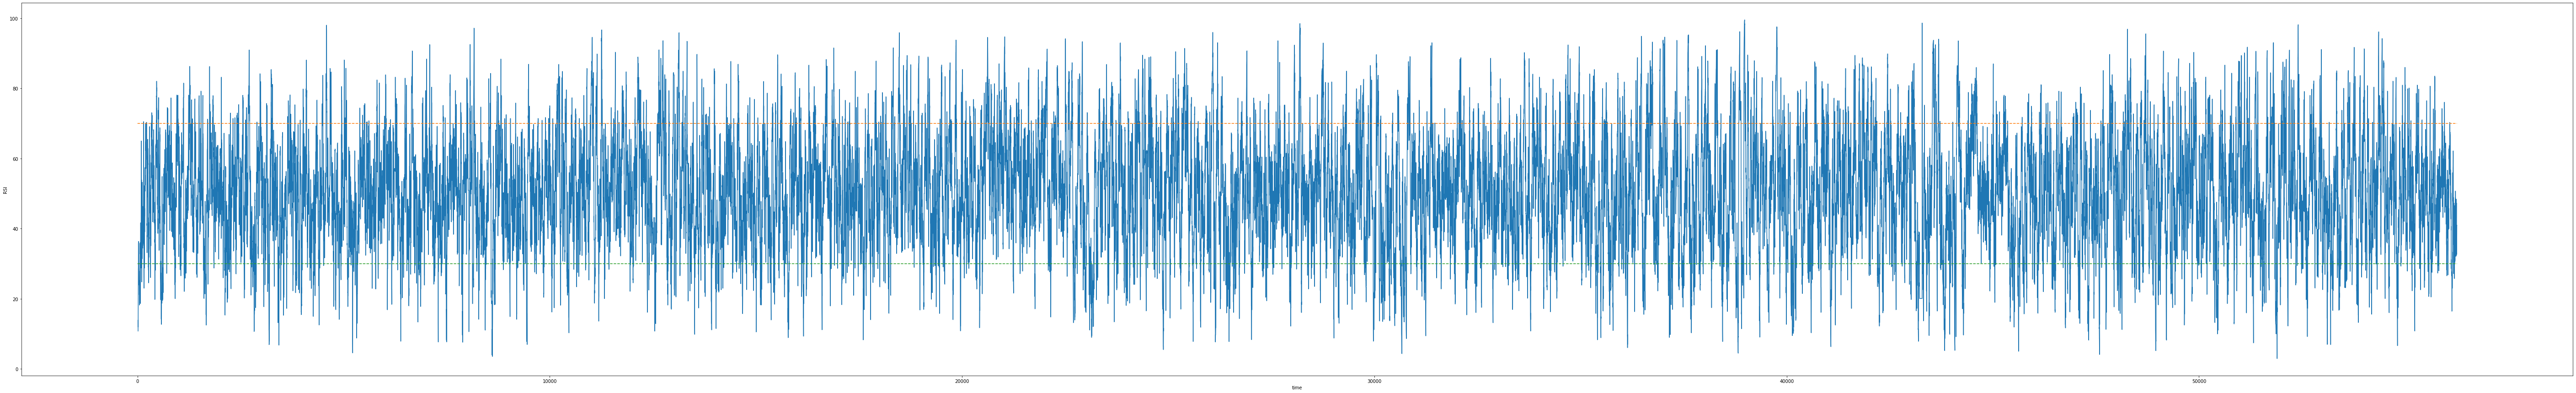

In [34]:
#visulaising data
plt.figure(figsize = (25,10))
plt.plot(data['Close'], label='Close')
plt.xlabel('time')
plt.ylabel('price')
plt.grid()
plt.legend()
plt.show()

#visualising RSI
plt.figure(figsize = (100,15))
plt.plot(data['RSI'])
plt.plot(data.index, [70]*len(data), '--')
plt.plot(data.index, [30]*len(data), '--')
plt.xlabel('time')
plt.ylabel('RSI')
plt.show()

In [35]:
sma_n = 7
sma_N = 14
SMA = pd.DataFrame()
SMA['SMA_n'] = data['RSI'].rolling(window = sma_n).mean()
SMA['SMA_N'] = data['RSI'].rolling(window = sma_N).mean()

In [36]:
#buy_sell function
def buy_sell(data, SMA):
   
    profitable_long_trades = 0           
    loss_long_trades = 0
    profitable_short_trades = 0
    loss_short_trades = 0   
    returns = 100
    flag0=-1
    flag1=-1
    buy_price_L = 0
    sell_price_L = 0
    buy_price_S = 0
    sell_price_S = 0
    maxx=0
    minn=0
    trade_closed_due_to_day_end = -1
    cummulative_algo_returns = [0]
    cummulative_market_returns = [0]
    profitable_trades_each_day = [0]*5
    loss_trades_each_day = [0]*5
    day_index =0
    PnL_per_trade_acc_to_given_formula = [np.nan]  # (Position Entry Price - Position Exit Price)*50, since 1 lot=50
    Cummulative_algo_PnL_acc_to_given_formula = 0  #addition of PnL_per_trade_acc_to_given_formula for all trades
    Market_PnL_acc_to_given_formula = (data['Close'][len(data) -1] - data['Close'][0] - 20)*50  #10 paise transaction cost at each time of buy and sell since 5rs for 1 lot=50 shares
    sig = [-1] #array which gives the signals for each trade and contains the info for each timestamp, {1:'long position opened', 0:'short position opened', -1:'not in position'}
    
    for i in range(1, len(data)):
        
        #opening long position if the conditions satisfied
        if SMA['SMA_n'][i] > SMA['SMA_N'][i] and SMA['SMA_n'][i-1] < SMA['SMA_N'][i-1] and data['RSI'][i]<40: 
                flag1=1
                buy_price_L = data['Close'][i] 
                #closing open short position due to signal reversal
                if flag0==0:        
                    buy_price_S = data['Close'][i] 
        
        #checking stoploss each time if long position is opened
        if flag1==1 and flag0==1:                                             
                if maxx < data['Close'][i]:
                    maxx = data['Close'][i]
                # closing the open long position if price hits the stoploss
                if data['Close'][i] <= 0.95*maxx:                  
                    sell_price_L = data['Close'][i] 
                    #print(i, ' long_close_due_to_stoploss')
                    flag1=-1 
                #closing open short position due to SMA_N > SMA_n , n=7 and N=14
                if SMA['SMA_n'][i] < SMA['SMA_N'][i] and SMA['SMA_n'][i-1] > SMA['SMA_N'][i-1] and data['RSI'][i]>60: 
                    sell_price_L = data['Close'][i]
                    flag1=-1
        
        #opening short position if the conditions satisfied
        if SMA['SMA_n'][i] < SMA['SMA_N'][i] and SMA['SMA_n'][i-1] > SMA['SMA_N'][i-1] and data['RSI'][i]>80: 
                flag1=0
                sell_price_S = data['Close'][i] 
                
 
        #checking stoploss each time if short position is opened
        if flag1==0 and flag0==0:     
                # closing the open short position if price hits the stoploss
                if data['Close'][i] >= 1.05*minn:                 
                    buy_price_S = data['Close'][i]
                    flag1 = -1
                if minn > data['Close'][i]:       
                    minn = data['Close'][i] 
        
        
        #opening the position at the start of the day continuing last trade forward if that was profitable
        if data['day'][i] != data['day'][i-1] and flag1==-1 and trade_closed_due_to_day_end != -1:  
                if trade_closed_due_to_day_end==0:
                    flag1=0
                    sell_price_S = data['Close'][i] 
                if trade_closed_due_to_day_end==1:
                    flag1=1
                    sell_price_L = data['Close'][i]         
        
        #closing the open position at the end of the day
        if data['hour'][i] == 15 and data['minute'][i]==30 and flag1!=-1:      
                if flag1==1:
                    sell_price_L = data['Close'][i] 
                    trade_closed_due_to_day_end = 1
                    flag1=-1
                if flag1==0:
                    buy_price_S = data['Close'][i] 
                    trade_closed_due_to_day_end = 0
                    flag1=-1
                trade_closed_due_to_day_end = 1
        else:
                trade_closed_due_to_day_end = -1
        
        #appending the position of trade in current timestamp in sig array
        sig.append(flag1)
        
        
        #calculating returns for every trade
        if data['day'][i]!=data['day'][i-1]:
            day_index+=1
            
        if flag0==0 and flag1!=0:                                                               #short trade executed
            returns += returns*((sell_price_S - buy_price_S - 20)/(sell_price_S-10) )
            Cummulative_algo_PnL_acc_to_given_formula+= (sell_price_S - buy_price_S - 20)*50
            PnL_per_trade_acc_to_given_formula.append( (sell_price_S - buy_price_S - 20)*50 )
            if sell_price_S - buy_price_S > 0:
                profitable_short_trades+=1
                profitable_trades_each_day[day_index]+=1
            else:
                loss_short_trades+=1
                loss_trades_each_day[day_index]+=1
                
        elif flag0==1 and flag1!=1:                                                             #long trade executed
            returns += returns*((sell_price_L - buy_price_L - 20)/(buy_price_L+10) )
            Cummulative_algo_PnL_acc_to_given_formula+= (sell_price_L - buy_price_L - 20)*50
            PnL_per_trade_acc_to_given_formula.append( (sell_price_L - buy_price_L - 20)*50 )
            if sell_price_L - buy_price_L > 0:
                profitable_long_trades+=1
                profitable_trades_each_day[day_index]+=1
            else:
                loss_long_trades+=1
                loss_trades_each_day[day_index]+=1
        else:
            PnL_per_trade_acc_to_given_formula.append(np.nan)
            
        
        flag0=flag1
        cummulative_algo_returns.append(returns-100)
        cummulative_market_returns.append( 100*(data['Close'][i]-data['Close'][0] - 20)/(data['Close'][0]+10) )   
    print('profitable_short_trades = {}'.format(profitable_short_trades))  
    print('loss_short_trades = {}'.format(loss_short_trades))    
    print('profitable_long_trades = {}'.format(profitable_long_trades))
    print('loss_long_trades = {}'.format(loss_long_trades))
    print('algo returns = ', returns-100)
    print('market returns = ', 100*(data['Close'][len(data)-1]-data['Close'][0] - 20)/(data['Close'][0]+10) )
    print('Cummulative_algo_PnL_acc_to_given_formula = {}'.format(Cummulative_algo_PnL_acc_to_given_formula))
    print('Cummulative_algo_PnL_acc_to_given_formula = {}'.format( Market_PnL_acc_to_given_formula ))
    win_loss_ratio_for_entire_testing_period = (profitable_short_trades + profitable_long_trades)/(loss_short_trades + loss_long_trades)
    total_buy_signals = profitable_long_trades + loss_long_trades
    total_sell_signals = profitable_short_trades + loss_short_trades
    
    return (cummulative_algo_returns, cummulative_market_returns, sig, profitable_trades_each_day, loss_trades_each_day, PnL_per_trade_acc_to_given_formula, win_loss_ratio_for_entire_testing_period, total_buy_signals, total_sell_signals)

In [37]:
bs = buy_sell(data, SMA)  #k=14, sma_n=7, sma_N=14 and trade close at day end
data['cummulative_algo_returns'] = bs[0]
data['cummulative_market_returns'] = bs[1]
data['buy_sell_signals'] = bs[2]
data['PnL per trade after its completion'] = bs[5]
print('win/loss per day = ', np.array(bs[3]) / np.array(bs[4]) )
print('win_loss_ratio_for_entire_testing_period = ', bs[6])
print('Total buy Signals = ', bs[7])
print('Total sell Signals = ', bs[8])

profitable_short_trades = 17
loss_short_trades = 12
profitable_long_trades = 183
loss_long_trades = 6
algo returns =  10.64585254038822
market returns =  3.2309512245067196
Cummulative_algo_PnL_acc_to_given_formula = 15234750.0
Cummulative_algo_PnL_acc_to_given_formula = 4772850.0
win/loss per day =  [11.66666667  9.75       11.          7.5        37.        ]
win_loss_ratio_for_entire_testing_period =  11.11111111111111
Total buy Signals =  189
Total sell Signals =  29


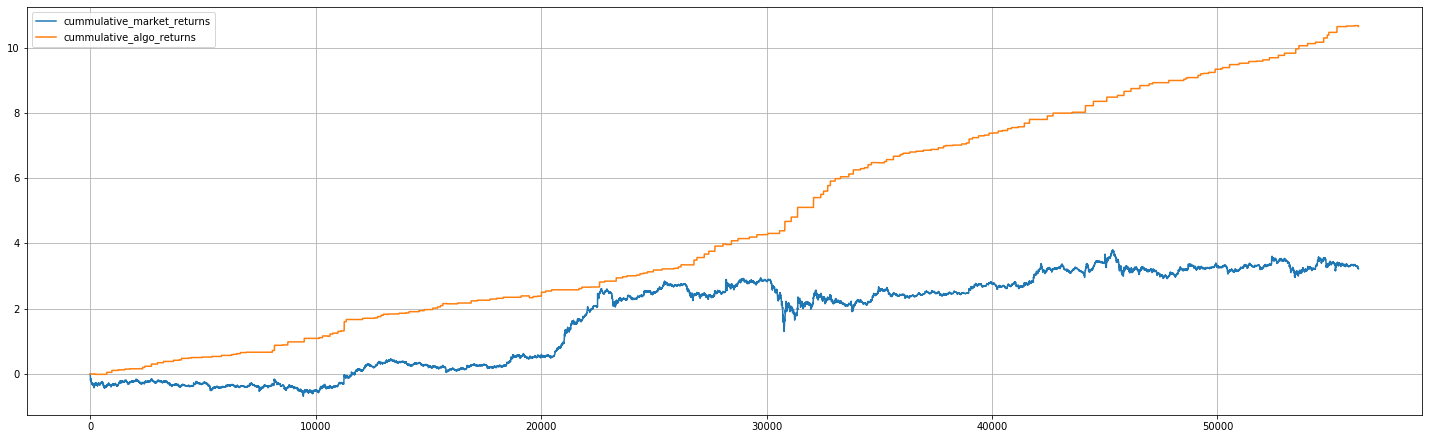

In [38]:
#visualising "cummulative_algo_returns" and "cummulative_market_returns"
plt.figure(figsize = (25,7.5))
plt.plot(data['cummulative_market_returns'], label='cummulative_market_returns')
plt.plot(data['cummulative_algo_returns'], label='cummulative_algo_returns')
plt.grid()
plt.legend()
plt.show()

In [39]:
data.to_csv(r'summary.csv', index=True)